NO: [0 1 2 3 4 5 6 7 8 9]
A: [5 3 7 1 0 6 8 7 4 2]
B: [0 1 2 3 4 5 6 7 8 9]
C [2 3 4 5 6 8 9 7 1 0]
D: [1 0 0 0 1 1 0 1 1 0]
E: [0 1 1 0 1 1 0 1 0 1]


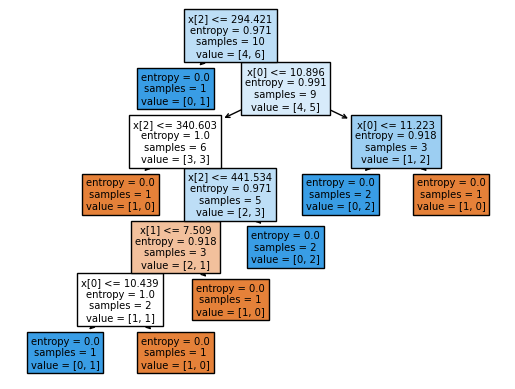

Predicted value: ['P']


In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np



# Data creation
NO=[1,2,3,4,5,6,7,8,9,10]
A=[10.5,9.8,11.2,9.2,9.1,10.8,11.5,11.2,10.3,9.7]
B=[1,5,20,60,90,120,180,220,340,410]
C=[400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9]
D=[1,0,0,0,1,1,0,1,1,0]
E=['N','P', 'P','N','P','P','N','P','N','P']


# Creating labelEncoder
le = preprocessing.LabelEncoder()


# Converting string labels into numbers.

Alt_encoded=le.fit_transform(NO)
Bar_encoded=le.fit_transform(A)
Fri_encoded=le.fit_transform(B)
Hun_encoded=le.fit_transform(C)
Pat_encoded=le.fit_transform(D)
label=le.fit_transform(E)

print("NO:" ,Alt_encoded)
print("A:" ,Bar_encoded)
print("B:" ,Fri_encoded)
print("C" ,Hun_encoded)
print("D:" ,Pat_encoded)
print("E:",label)

# Combinig attributes into single listof tuples
#features=list(zip(Alt_encoded,Bar_encoded,Fri_encoded,Hun_encoded,Pat_encoded, Price_encoded,Rain_encoded,Res_encoded, Type_encoded,Est_encoded))
features=list(zip(A,B,C,D))


# Create and fit the model
model = GaussianNB()
model.fit(features, E)

clf = DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='random').fit(features,label )
plot_tree(clf, filled=True)
plt.show()
# Predict the output (first line = sunny, hot, high, false; must be 0 or N)
predicted = model.predict([[100, 100, 550, 1]])
#[100,100,550,True]
#predicted = model.predict([[100, 100, 550, 1]])

#[10,10,300,False]
predicted = model.predict([[10, 10, 300, 0]])
#[5,500,200,False]
predicted = model.predict([[5,500,200,0]])

#predicted = model.predict(features)
print("Predicted value:", predicted)

Regresion polinomial


RMSE:  0.7552271619321262
R2:  0.13593687907884577


Text(0, 0.5, 'y')

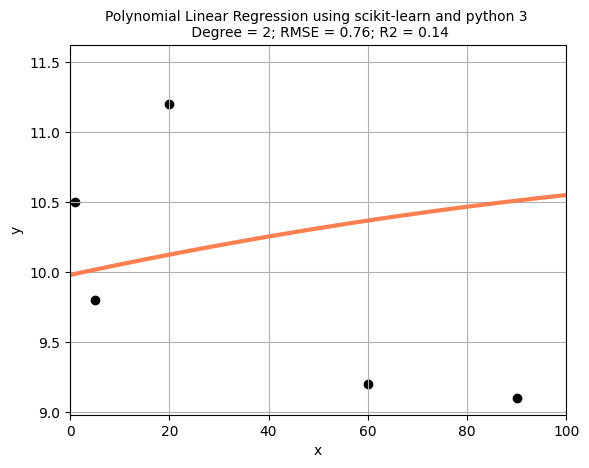

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


A=[10.5,9.8,11.2,9.2,9.1,10.8,11.5,11.2,10.3,9.7]
B=[1,5,20,60,90,120,180,220,340,410]
C=[400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9]
D=[1,0,0,0,1,1,0,1,1,0]

x = np.array(B).reshape(-1, 1)
y = np.array(A)
nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(x)

model = linear_model.LinearRegression()
model.fit(X_TRANSF, y)
Y_NEW = model.predict(X_TRANSF)
rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)
print('RMSE: ', rmse)
print('R2: ', r2)

x_new_min = 0
x_new_max = 100

X_NEW = np.linspace(x_new_min, x_new_max,100)
X_NEW = X_NEW[:,np.newaxis]
X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)
plt.scatter(x, y,  color='black')
plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)
plt.grid()
plt.xlim(x_new_min,x_new_max)
title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2),
                                                 round(r2,2))
plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " +
          title, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Datos proporcionados
A = [10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]
B = [1, 5, 20, 60, 90, 120, 180, 220, 340, 410]

# Convertir las listas en arrays de NumPy
B = np.array(B).reshape(-1, 1)
A = np.array(A)

# Crear una instancia de PolynomialFeatures de grado 2
poly_features = PolynomialFeatures(degree=2)

# Transformar los datos de entrada (A) en características polinómicas
B_poly = poly_features.fit_transform(B)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(B_poly, A)

# Realizar la predicción para un correlativo de 30
correlativo_30 = np.array([[30]])  # Valor de correlativo 30
correlativo_30_poly = poly_features.transform(correlativo_30)
prediccion_B = model.predict(correlativo_30_poly)

# Imprimir el resultado con 2 decimales sin redondear
print(f"Predicción de B para correlativo 30: {prediccion_B[0]:.2f}")


Predicción de B para correlativo 30: 10.19


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos desde el archivo pred.csv

# Obtener los valores de A y C
A=[10.5,9.8,11.2,9.2,9.1,10.8,11.5,11.2,10.3,9.7]
B=[1,5,20,60,90,120,180,220,340,410]
C=[400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9]
D=[1,0,0,0,1,1,0,1,1,0]

C = np.array(C).reshape(-1, 1)
A = np.array(A)


# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(C, A)

# Realizar predicciones
A_pred = model.predict(C)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(A, A_pred)

# Imprimir el resultado con 2 decimales sin redondear
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")


Error Cuadrático Medio (MSE): 0.53


Regresion Lineal

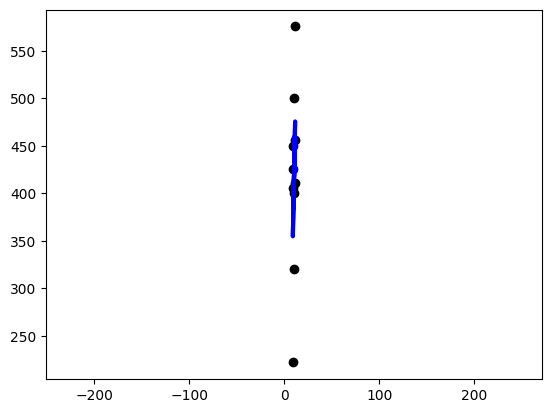

[2416.33396455]


In [ ]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


A=[10.5,9.8,11.2,9.2,9.1,10.8,11.5,11.2,10.3,9.7]
B=[1,5,20,60,90,120,180,220,340,410]
C=[400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9]
D=[1,0,0,0,1,1,0,1,1,0]


# ingresar datos de entrenamiento
x = np.array(A).reshape(-1, 1)
y = np.array(C)

# entrenar el modelo y predecir
model = linear_model.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

# graficar datos y predicción
plt.scatter(x, y,  color='black')
plt.axis("equal")
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.show()
x_new = np.array([50]).reshape(-1,1)
#prediccion_20 = model.predict(np.array([correlativo_20]).reshape(-1, 1))
#x_new = np.array([95,85,75,65,55,45,35,25,15]).reshape(-1,1)
print(model.predict(x_new))

In [ ]:
import random

# Función de aptitud (fitness)
def fitness(x):
    return 25 * x - x**2

# Conversión de valor binario a decimal
def binary_to_decimal(binary):
    decimal = int(binary, 2)
    return decimal

# Conversión de decimal a binario de 5 bits
def decimal_to_binary(decimal):
    binary = bin(decimal)[2:].zfill(5)
    return binary

# Inicialización de la generación 1
generation = ["01011", "01100", "00010", "11011"]

# Criterio de convergencia
convergence_threshold = 0.7

# Inicialización del contador de generaciones
generations_created = 1

while True:
    # Evaluar la aptitud de cada individuo en la generación
    fitness_values = [fitness(binary_to_decimal(ind)) for ind in generation]

    # Calcular el promedio de la aptitud
    average_fitness = sum(fitness_values) / len(generation)

    # Verificar el criterio de convergencia
    if average_fitness >= convergence_threshold:
        break

    # Realizar selección por torneo
    parents = []
    for _ in range(len(generation) // 2):
        tournament = random.sample(generation, 2)
        parent1, parent2 = tournament[0], tournament[1]
        parents.append((parent1, parent2))

    # Realizar cruce multipunto (zigzag)
    children = []
    for parent1, parent2 in parents:
        crossover_point = random.randint(1, 3)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        children.extend([child1, child2])

    # Reemplazo
    generation = children

    # Incrementar el contador de generaciones
    generations_created += 1

# Resultado
print("Número de generaciones creadas:", generations_created)


Número de generaciones creadas: 1


In [ ]:
import random

# Función de aptitud (fitness)
def fitness(x):
    return 25 * x - x**2

# Conversión de valor binario a decimal
def binary_to_decimal(binary):
    decimal = int(binary, 2)
    return decimal

# Conversión de decimal a binario de 5 bits
def decimal_to_binary(decimal):
    binary = bin(decimal)[2:].zfill(5)
    return binary

# Inicialización de la generación 1
generation = ["01011", "01100", "00010", "11011"]

# Criterio de convergencia
convergence_threshold = 0.7

# Inicialización del contador de generaciones
generations_created = 1

while True:
    # Evaluar la aptitud de cada individuo en la generación
    fitness_values = [fitness(binary_to_decimal(ind)) for ind in generation]

    # Calcular el promedio de la aptitud
    average_fitness = sum(fitness_values) / len(generation)

    # Verificar el criterio de convergencia
    if average_fitness >= convergence_threshold:
        break

    # Realizar selección por torneo
    parents = []
    for _ in range(len(generation) // 2):
        tournament = random.sample(generation, 2)
        parent1, parent2 = tournament[0], tournament[1]
        parents.append((parent1, parent2))

    # Realizar cruce multipunto (zigzag)
    children = []
    for parent1, parent2 in parents:
        crossover_points = [random.randint(1, 4), random.randint(1, 4)]
        crossover_points.sort()
        child1 = parent1[:crossover_points[0]] + parent2[crossover_points[0]:crossover_points[1]] + parent1[crossover_points[1]:]
        child2 = parent2[:crossover_points[0]] + parent1[crossover_points[0]:crossover_points[1]] + parent2[crossover_points[1]:]
        children.extend([child1, child2])

    # Reemplazo
    generation = children

    # Incrementar el contador de generaciones
    generations_created += 1

# Calcular la suma de los valores x en la generación 3
if generations_created >= 3:
    generation_3 = generation
    sum_x_generation_3 = sum([binary_to_decimal(ind) for ind in generation_3])
    print("Suma de los valores x en la generación 3:", sum_x_generation_3)
else:
    print("El criterio de convergencia se alcanzó antes de llegar a la generación 3.")

# Resultado
print("Número de generaciones creadas:", generations_created)


El criterio de convergencia se alcanzó antes de llegar a la generación 3.
Número de generaciones creadas: 1


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos
A = np.array([10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]).reshape(-1, 1)
C = np.array([400.5, 405.8, 410.9, 425.4, 450.1, 500.5, 575.7, 456.5, 320.1, 221.9])

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(A, C)

# Realizar predicciones
C_pred = model.predict(A)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(C, C_pred)

# Imprimir el resultado
print("Coeficiente de determinación (R^2):", round(r2, 2))


Coeficiente de determinación (R^2): 0.2


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos
A = np.array([10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]).reshape(-1, 1)

C = np.array([400.5, 405.8, 410.9, 425.4, 450.1, 500.5, 575.7, 456.5, 320.1, 221.9])


# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(A, C)

# Realizar predicciones
B_pred = model.predict(A)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(C, B_pred)

# Imprimir el resultado
print("Coeficiente de determinación (R^2) para el atributo A:", round(r2, 2))


Coeficiente de determinación (R^2) para el atributo A: 0.2


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos
# simple son tema de  C
# Polinomiales son tema de B

#A=[10.5,9.8,11.2,9.2,9.1,10.8,11.5,11.2,10.3,9.7]
#B=[1,5,20,60,90,120,180,220,340,410]
#C=[400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9]
#D=[1,0,0,0,1,1,0,1,1,0]


A = np.array([10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]).reshape(-1, 1)
C = np.array([400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9])




# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(A, C)

# Obtener el coeficiente de regresión (pendiente)
coef_regresion = model.coef_[0]

# Imprimir el resultado
print("Coeficiente de regresión para el atributo A:", "{:.2f}".format(coef_regresion))


Coeficiente de regresión para el atributo A: 50.41


In [ ]:
import random

# Función de aptitud (fitness)
def fitness(x):
    return 25 * x - x**2

# Conversión de valor binario a decimal
def binary_to_decimal(binary):
    decimal = int(binary, 2)
    return decimal

# Conversión de decimal a binario de 5 bits
def decimal_to_binary(decimal):
    binary = bin(decimal)[2:].zfill(5)
    return binary

# Inicialización de la generación 1
generation = ["01011", "01100", "00010", "11011"]

# Criterio de convergencia
convergence_threshold = 0.7

# Inicialización del contador de generaciones
generations_created = 1

while True:
    # Evaluar la aptitud de cada individuo en la generación
    fitness_values = [fitness(binary_to_decimal(ind)) for ind in generation]

    # Calcular el promedio de la aptitud
    average_fitness = sum(fitness_values) / len(generation)

    # Verificar el criterio de convergencia
    if average_fitness >= convergence_threshold:
        break

    # Realizar selección por torneo
    parents = []
    for _ in range(len(generation) // 2):
        tournament = random.sample(generation, 2)
        parent1, parent2 = tournament[0], tournament[1]
        parents.append((parent1, parent2))

    # Realizar cruce multipunto (zigzag)
    children = []
    for parent1, parent2 in parents:
        crossover_points = [random.randint(1, 4), random.randint(1, 4)]
        crossover_points.sort()
        child1 = parent1[:crossover_points[0]] + parent2[crossover_points[0]:crossover_points[1]] + parent1[crossover_points[1]:]
        child2 = parent2[:crossover_points[0]] + parent1[crossover_points[0]:crossover_points[1]] + parent2[crossover_points[1]:]
        children.extend([child1, child2])

    # Reemplazo
    generation = children

    # Incrementar el contador de generaciones
    generations_created += 1

# Calcular cuántos valores de fitness son negativos en la última generación
neg_fitness_count = sum(1 for value in fitness_values if value < 0)

# Resultado
print("Número de generaciones creadas:", generations_created)
print("Valores negativos de fitness en la última generación:", neg_fitness_count)


Número de generaciones creadas: 1
Valores negativos de fitness en la última generación: 1


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Datos de entrada
A = np.array([10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]).reshape(-1, 1)
B = np.array([1, 5, 20, 60, 90, 120, 180, 220, 340, 410]).reshape(-1, 1)

# Grado del polinomio
grado = 2

# Crear un objeto PolynomialFeatures para generar características polinómicas
poly_features = PolynomialFeatures(degree=grado)
#A_poly = poly_features.fit_transform(A)
B_poly = poly_features.fit_transform(B)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos polinómicos
#model.fit(A_poly, B)
model.fit(B_poly, A)

# Realizar la predicción para un correlativo 50
correlativo_50 = np.array([50]).reshape(1, -1)
correlativo_50_poly = poly_features.transform(correlativo_50)
prediccion_B_50 = model.predict(correlativo_50_poly)

# Imprimir el resultado con dos decimales sin redondear
print("Predicción del atributo B para un correlativo 50:", "{:.2f}".format(prediccion_B_50[0, 0]))


Predicción del atributo B para un correlativo 50: 10.31


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos de entrada
A = np.array([10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]).reshape(-1, 1)
B = np.array([1, 5, 20, 60, 90, 120, 180, 220, 340, 410])

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(B.reshape(-1, 1), A)

# Realizar la predicción para un correlativo 50
correlativo_50 = np.array([50]).reshape(1, -1)
prediccion_A_50 = model.predict(correlativo_50)

# Imprimir el resultado con dos decimales sin redondear
print("Predicción del atributo A para un correlativo 50:", "{:.2f}".format(prediccion_A_50[0, 0]))


Predicción del atributo A para un correlativo 50: 10.32


In [ ]:
import random

# Función de aptitud (fitness)
def fitness(x):
    return 25 * x - x**2

# Conversión de valor binario a decimal
def binary_to_decimal(binary):
    decimal = int(binary, 2)
    return decimal

# Conversión de decimal a binario de 5 bits
def decimal_to_binary(decimal):
    binary = bin(decimal)[2:].zfill(5)
    return binary

# Inicialización de la generación 1
generation = ["01011", "01100", "00010", "11011"]

# Criterio de convergencia
convergence_threshold = 0.7

# Inicialización del contador de generaciones
generations_created = 0

lowest_fitness = float('inf')

while generations_created < 4:
    # Evaluar la aptitud de cada individuo en la generación
    fitness_values = [fitness(binary_to_decimal(ind)) for ind in generation]

    # Encontrar el valor del fitness más bajo en la generación actual
    current_lowest_fitness = min(fitness_values)
    if current_lowest_fitness < lowest_fitness:
        lowest_fitness = current_lowest_fitness

    # Calcular el promedio de la aptitud
    average_fitness = sum(fitness_values) / len(generation)

    # Verificar el criterio de convergencia
    if average_fitness >= convergence_threshold:
        break

    # Realizar selección por torneo
    parents = []
    for _ in range(len(generation) // 2):
        tournament = random.sample(generation, 2)
        parent1, parent2 = tournament[0], tournament[1]
        parents.append((parent1, parent2))

    # Realizar cruce multipunto (zigzag)
    children = []
    for parent1, parent2 in parents:
        crossover_points = [random.randint(1, 4), random.randint(1, 4)]
        crossover_points.sort()
        child1 = parent1[:crossover_points[0]] + parent2[crossover_points[0]:crossover_points[1]] + parent1[crossover_points[1]:]
        child2 = parent2[:crossover_points[0]] + parent1[crossover_points[0]:crossover_points[1]] + parent2[crossover_points[1]:]
        children.extend([child1, child2])

    # Reemplazo
    generation = children

    # Incrementar el contador de generaciones
    generations_created += 1

# Resultado
print("Valor del fitness más bajo de las 4 generaciones:", lowest_fitness)


Valor del fitness más bajo de las 4 generaciones: -54


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos de entrada
A = np.array([10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]).reshape(-1, 1)
#B = np.array([1, 5, 20, 60, 90, 120, 180, 220, 340, 410]).reshape(-1, 1)
C = np.array([400.5, 405.8, 410.9, 425.4, 450.1, 500.5, 575.7, 456.5, 320.1, 221.9]).reshape(-1, 1)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(A, C)

# Realizar la predicción para un correlativo 20
correlativo_20 = np.array([20]).reshape(1, -1)
prediccion_C_20 = model.predict(correlativo_20)

# Imprimir el resultado con dos decimales sin redondear
print("Predicción del atributo C para un correlativo 20:", "{:.2f}".format(prediccion_C_20[0, 0]))


Predicción del atributo C para un correlativo 20: 904.16


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Datos proporcionados
A = [10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]
B = [1, 5, 20, 60, 90, 120, 180, 220, 340, 410]

# Convertir las listas en arrays de NumPy
A = np.array(A).reshape(-1, 1)
B = np.array(B)

# Crear una instancia de PolynomialFeatures de grado 2
poly_features = PolynomialFeatures(degree=2)

# Transformar los datos de entrada (A) en características polinómicas
A_poly = poly_features.fit_transform(A)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(A_poly, B)

# Predecir los valores de B
B_pred = model.predict(A_poly)

# Calcular el R-cuadrado
r2 = r2_score(B, B_pred)

# Imprimir el resultado con 2 decimales
print(f"R-cuadrado (grado 2): {r2:.2f}")


R-cuadrado (grado 2): 0.03


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos proporcionados
A = [10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]
B = [1, 5, 20, 60, 90, 120, 180, 220, 340, 410]
C = [400.5, 405.8, 410.9, 425.4, 450.1, 500.5, 575.7, 456.5, 320.1, 221.9]

# Convertir las listas en arrays de NumPy
#A = np.array(A).reshape(-1, 1)
C = np.array(C).reshape(-1, 1)
A = np.array(A)

#C = np.array(C)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrada A y salida C
model.fit(C, A)

# Realizar la predicción para un correlativo de 50
correlativo_50 = np.array([[50]])  # Valor de correlativo 50
prediccion_C = model.predict(correlativo_50)

# Imprimir el resultado con 2 decimales sin redondear
print(f"Predicción de C para correlativo 50: {prediccion_C[0]:.2f}")


Predicción de C para correlativo 50: 8.86


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos proporcionados
A = [10.5, 9.8, 11.2, 9.2, 9.1, 10.8, 11.5, 11.2, 10.3, 9.7]
B = [1, 5, 20, 60, 90, 120, 180, 220, 340, 410]
C = [400.5, 405.8, 410.9, 425.4, 450.1, 500.5, 575.7, 456.5, 320.1, 221.9]

# Convertir las listas en arrays de NumPy
A = np.array(A).reshape(-1, 1)
B = np.array(B)
C = np.array(C)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrada A y salida C
model.fit(A, C)

# Realizar la predicción para un correlativo de 50
correlativo_50 = np.array([[30]])  # Valor de correlativo 50
prediccion_C = model.predict(correlativo_50)

# Imprimir el resultado con 2 decimales sin redondear
print(f"Predicción de C para correlativo 50: {prediccion_C[0]:.2f}")


Predicción de C para correlativo 50: 1408.22


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

A=[10.5,9.8,11.2,9.2,9.1,10.8,11.5,11.2,10.3,9.7]
B=[1,5,20,60,90,120,180,220,340,410]
C=[400.5,405.8,410.9,425.4,450.1,500.5,575.7,456.5,320.1,221.9]
D=[1,0,0,0,1,1,0,1,1,0]

# Cargar los datos desde el archivo pred.csv
#data = pd.read_csv('pred.csv')

# Obtener los valores de B y A
#B = data['B'].values.reshape(-1, 1)
#A = data['A'].values

B = np.array(B).reshape(-1, 1)
A = np.array(A)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(A, B)

# Realizar predicción para un correlativo de 20
correlativo_20 = np.array([[20]])  # Valor de correlativo 20
prediccion_A = model.predict(correlativo_20)

# Imprimir el resultado con 2 decimales sin redondear
print(f"Predicción de A para correlativo 20: {prediccion_A[0]:.2f}")


ValueError: ignored

In [ ]:
import numpy as np

# Función de aptitud (fitness)
def fitness(x):
    return 25 * x - x**2

# Conversión de número binario a decimal
def binary_to_decimal(binary_str):
    return int(binary_str, 2)

# Conversión de número decimal a binario
def decimal_to_binary(decimal, num_bits):
    binary_str = bin(decimal)[2:]
    return binary_str.zfill(num_bits)

# Generación 1
generation1 = ['10110', '11000', '00100', '11011']

num_generations = 100
convergence_threshold = 0.7  # Criterio de convergencia (70% entre promedios)

for generation in range(num_generations):
    # Evaluar el fitness de cada individuo en la generación actual
    fitness_values = [fitness(binary_to_decimal(individual)) for individual in generation]

    # Calcular el promedio del fitness de la generación actual
    avg_fitness = np.mean(fitness_values)

    # Verificar el criterio de convergencia
    if generation > 0 and avg_fitness >= convergence_threshold * previous_avg_fitness:
        break

    # Seleccionar padres por torneo
    parents = []
    for _ in range(2):
        tournament = np.random.choice(generation, 2, replace=False)
        parent = tournament[np.argmax([fitness_values[int(tournament[0], 2)], fitness_values[int(tournament[1], 2)]])]
        parents.append(parent)

    # Cruce multipunto (zigzag)
    crossover_point = len(parents[0]) // 2
    child1 = parents[0][:crossover_point] + parents[1][crossover_point:]
    child2 = parents[1][:crossover_point] + parents[0][crossover_point:]

    # Reemplazo: mejor padre, peor hijo, mejor hijo, peor padre
    fitness_parents = [fitness(binary_to_decimal(parent)) for parent in parents]
    fitness_children = [fitness(binary_to_decimal(child1)), fitness(binary_to_decimal(child2)]

    best_parent_idx = np.argmax(fitness_parents)
    worst_child_idx = np.argmin(fitness_children)
    best_child_idx = np.argmax(fitness_children)
    worst_parent_idx = np.argmin(fitness_parents)

    generation.remove(parents[best_parent_idx])
    generation.remove(generation[worst_child_idx])
    generation.remove(parents[best_child_idx])
    generation.remove(parents[worst_parent_idx])

    generation.extend([child1, child2])

    # Almacenar el promedio del fitness actual como el anterior
    previous_avg_fitness = avg_fitness

# Encontrar el individuo más apto al finalizar el algoritmo
best_individual = max(generation, key=lambda x: fitness(binary_to_decimal(x)))

# Imprimir el resultado
print(f"Individuo más apto al finalizar el algoritmo (en binario): {best_individual}")
print(f"Individuo más apto al finalizar el algoritmo (en decimal): {binary_to_decimal(best_individual)}")
print(f"Fitness del individuo más apto: {fitness(binary_to_decimal(best_individual)}")


SyntaxError: ignored